In [4]:
import pandas as pd
import numpy as np
import math

In [570]:
N_SAMPLES = 2000

In [571]:
def make_sin(n, freq):
    return list(map(lambda x: math.sin(x[0] * math.pi / freq), enumerate(np.zeros(n))))

In [642]:
freqs = np.arange(45, 5, -2)
freqs

array([45, 43, 41, 39, 37, 35, 33, 31, 29, 27, 25, 23, 21, 19, 17, 15, 13,
       11,  9,  7])

In [662]:
source_df = []

for freq in freqs:
    source_df = source_df + make_sin(200, freq)
    
len(source_df)

4000

In [665]:
target_df = []

for freq in freqs:
    target_df = target_df + make_sin(200, freq / 2.0)
    
len(target_df)

4000

In [666]:
# TR_END_LOC = int(len(target_df) * 0.8)
# TR_END_LOC = int(len(target_df) * 0.8 / 100) * 100
TR_END_LOC = int(len(target_df) * 0.8 / 10) * 10
TR_END_LOC

3200

In [667]:
X_train_raw = source_df[:TR_END_LOC]
y_train_raw = target_df[:TR_END_LOC]

X_test_raw = source_df[:TR_END_LOC]
y_test_raw = target_df[:TR_END_LOC]

In [668]:
MAX_VALUE = 1.0

## Preparing data for processing

In [669]:
def normalize_keeping_mean(arr, forced_abs=None):
    left_abs = np.abs(arr.mean() - arr.min())
    right_abs = np.abs(arr.max() - arr.mean())
    
    n = max(left_abs, right_abs)
    
    if (forced_abs is not None):
        n = forced_abs
    
    return np.clip(arr / n, -1.0, 1.0)

In [670]:
def normalize(arr, forced_abs=None, mean=None):
    left_abs = np.abs(arr.mean() - arr.min())
    right_abs = np.abs(arr.max() - arr.mean())
    
    n = max(left_abs, right_abs)
    
    if (forced_abs is not None):
        n = forced_abs
        
    if (mean is None):
        mean = arr.mean()
    
    
    return np.clip((arr - mean) / n, -1.0, 1.0)

In [671]:
import numpy as np

X_tr = np.array(list(map(lambda x: np.array(x), X_train_raw)))
X_tr_n = normalize(X_tr, forced_abs=MAX_VALUE, mean=0.0)
X_tr_n.min(), X_tr_n.max(), np.mean(X_tr_n)

(-0.9993908270190958, 0.9993908270190958, 0.053285752477560996)

In [672]:
X_te = np.array(list(map(lambda x: np.array(x), X_test_raw)))
X_te_n= normalize(X_te, forced_abs=MAX_VALUE, mean=0.0)
X_te_n.min(), X_te_n.max(), np.mean(X_te_n)

(-0.9993908270190958, 0.9993908270190958, 0.053285752477560996)

In [673]:
y_tr = np.array(list(map(lambda x: np.array(x), y_train_raw)))
y_tr_n = normalize(y_tr, forced_abs=MAX_VALUE, mean=0.0)
y_tr_n.min(), y_tr_n.max(), np.mean(y_tr_n)

(-0.9993908270190958, 0.9993908270190958, 0.027775397231006523)

In [674]:
y_te = np.array(list(map(lambda x: np.array(x), y_test_raw)))
y_te_n = normalize(y_te, forced_abs=MAX_VALUE, mean=0.0)
y_te_n.min(), y_te_n.max(), np.mean(y_te_n)

(-0.9993908270190958, 0.9993908270190958, 0.027775397231006523)

In [675]:
X_tr_n = X_tr_n.astype('float32')
# X_te_n = X_te_n.astype('float32')
y_tr_n = y_tr_n.astype('float32')
# y_te_n = y_te_n.astype('float32')

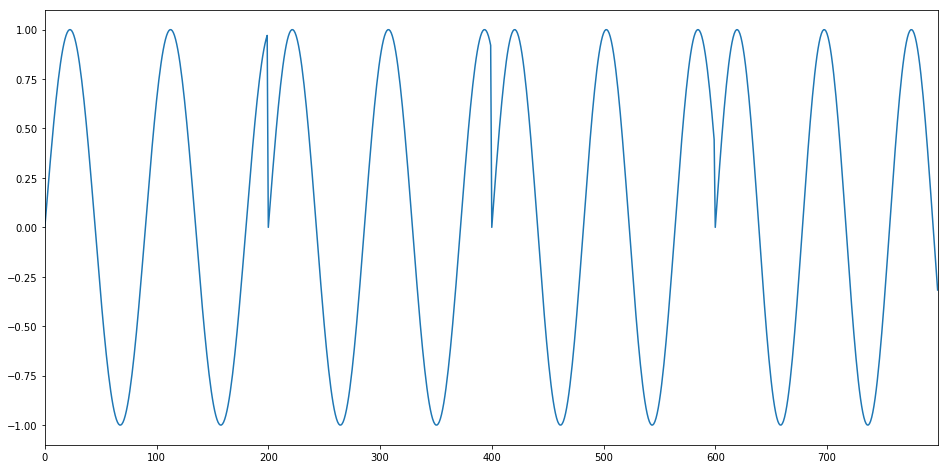

In [676]:
%matplotlib inline
pd.Series(X_tr_n[:800]).plot.line(figsize=(16, 8))

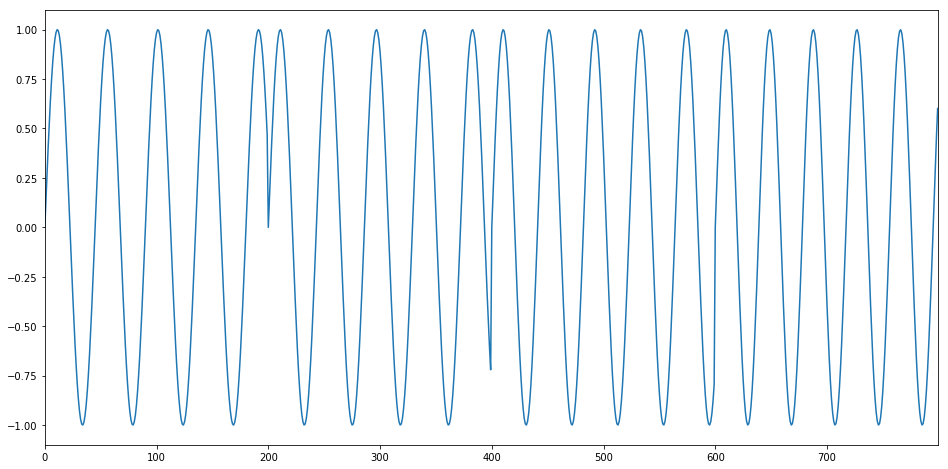

In [677]:
pd.Series(y_tr_n[:800]).plot.line(figsize=(16, 8))

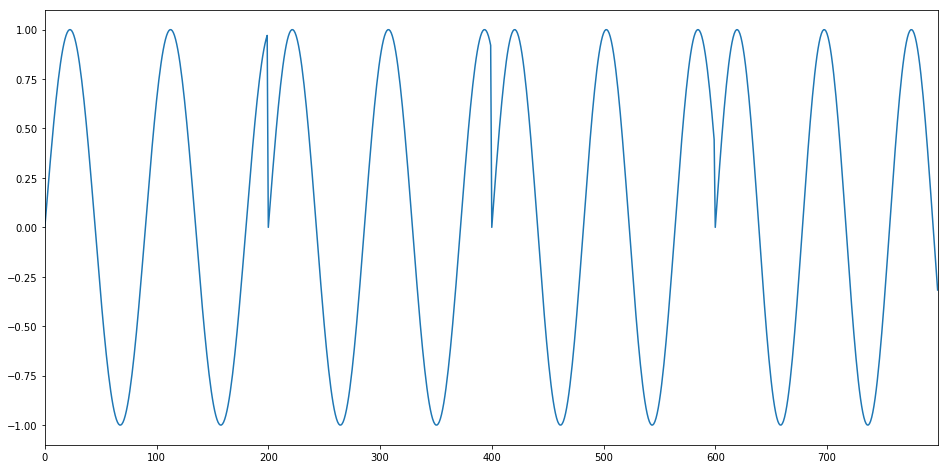

In [678]:
pd.Series(X_te_n[:800]).plot.line(figsize=(16, 8))

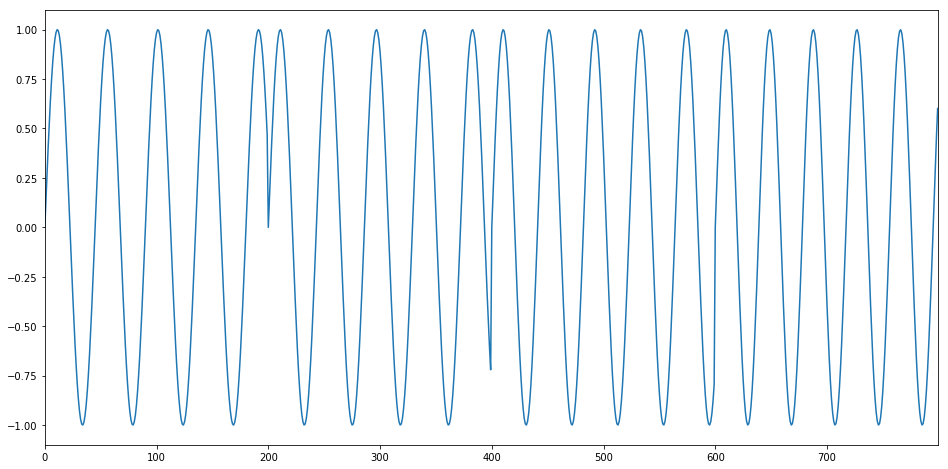

In [679]:
pd.Series(y_te_n[:800]).plot.line(figsize=(16, 8))

In [680]:
# appending stats of the whole sample, fading from silence

In [681]:
# train_shuffle_index = np.random.shuffle(np.arange(0, len(X_tr_n)))
# test_shuffle_index = np.random.shuffle(np.arange(0, len(X_te_n)))

# X_tr_f = X_tr_n[train_shuffle_index][0]
# y_tr_f = y_tr_n[train_shuffle_index][0]

# X_te_f = X_te_n[test_shuffle_index][0]
# y_te_f = y_te_n[test_shuffle_index][0]

## Making windows

In [682]:
# N_WINDOW_POINTS = int(source_clean_fs * 0.02)
# N_WINDOW_POINTS = 64
N_WINDOW_POINTS = 20
N_WINDOW_POINTS

20

In [683]:
# N_SAMPLES = 44000 * 12
N_SAMPLES

2000

In [684]:
def make_windows(X, y, n_window_points):
    X_index = X.index
    index = 0
    
    res_X = []
    res_y = []

    for index in range(0, len(X) - n_window_points - 1):
        res_X.append(X.iloc[index:(index + n_window_points)])
#         res_y.append(y.iloc[index + n_window_points])
        res_y.append(y.iloc[index + n_window_points - 1])

    return (np.array(res_X), np.array(res_y))

In [685]:
%%time
(X_tr_f, y_tr_f) = make_windows(
    pd.Series(X_tr_n[:(N_SAMPLES + N_WINDOW_POINTS + 1)]),
    pd.Series(y_tr_n[:(N_SAMPLES + N_WINDOW_POINTS + 1)]),
    N_WINDOW_POINTS)
print((len(X_tr_f), X_tr_f[0], y_tr_f[0]))

globals().update(locals())

(2000, array([0.        , 0.06975647, 0.1391731 , 0.20791169, 0.27563736,
       0.34202015, 0.40673664, 0.46947157, 0.52991927, 0.58778524,
       0.64278764, 0.6946584 , 0.7431448 , 0.7880108 , 0.82903755,
       0.8660254 , 0.89879405, 0.92718387, 0.95105654, 0.9702957 ],
      dtype=float32), 0.46947157)
CPU times: user 282 ms, sys: 7.94 ms, total: 290 ms
Wall time: 295 ms


In [686]:
X_tr_f[1], y_tr_f[1]

(array([0.06975647, 0.1391731 , 0.20791169, 0.27563736, 0.34202015,
        0.40673664, 0.46947157, 0.52991927, 0.58778524, 0.64278764,
        0.6946584 , 0.7431448 , 0.7880108 , 0.82903755, 0.8660254 ,
        0.89879405, 0.92718387, 0.95105654, 0.9702957 , 0.9848077 ],
       dtype=float32), 0.34202015)

In [687]:
%%time
(X_te_f, y_te_f) = make_windows(
    pd.Series(X_te_n[:(N_SAMPLES + N_WINDOW_POINTS + 1)]),
    pd.Series(y_te_n[:(N_SAMPLES + N_WINDOW_POINTS + 1)]),
    N_WINDOW_POINTS
)
print((len(X_te_f), X_te_f[0], y_te_f[0]))

globals().update(locals())

(2000, array([0.        , 0.06975647, 0.1391731 , 0.20791169, 0.27563736,
       0.34202014, 0.40673664, 0.46947156, 0.52991926, 0.58778525,
       0.64278761, 0.69465837, 0.74314483, 0.78801075, 0.82903757,
       0.8660254 , 0.89879405, 0.92718385, 0.95105652, 0.97029573]), 0.4694715627858911)
CPU times: user 298 ms, sys: 9.94 ms, total: 308 ms
Wall time: 314 ms


In [688]:
X_te_f[1], y_te_f[1]

(array([0.06975647, 0.1391731 , 0.20791169, 0.27563736, 0.34202014,
        0.40673664, 0.46947156, 0.52991926, 0.58778525, 0.64278761,
        0.69465837, 0.74314483, 0.78801075, 0.82903757, 0.8660254 ,
        0.89879405, 0.92718385, 0.95105652, 0.97029573, 0.98480775]),
 0.3420201433256689)

In [689]:
# import numpy as np

# train_shuffle_index = np.arange(0, len(X_tr_f))
# np.random.shuffle(train_shuffle_index)

# test_shuffle_index = np.arange(0, len(X_te_f))
# np.random.shuffle(test_shuffle_index)

# X_tr_f = np.array(X_tr_f)[train_shuffle_index]
# y_tr_f = np.array(y_tr_f)[train_shuffle_index]

# X_te_f = np.array(X_te_f)[test_shuffle_index]
# y_te_f = np.array(y_te_f)[test_shuffle_index]

# X_tr_f[0], y_tr_f[0], len(X_tr_f), len(y_tr_f), len(X_te_f), len(y_te_f)

In [690]:
# X_tr_f = X_tr_n
# y_tr_f = y_tr_n

# X_te_f = X_te_n
# y_te_f = y_te_n

In [691]:
len(X_tr_f), len(y_tr_f) # , len(X_te_f), len(y_te_f))

(2000, 2000)

In [692]:
# list(map(lambda row: row[:N_PEAKS*2], X_tr_f))[0]
# # list(map(lambda row: row[:N_PEAKS], X_tr_f))[0]

In [693]:
# from matplotlib import pyplot as plt

# # amp_df = pd.DataFrame(list(map(lambda row: row[N_PEAKS:N_PEAKS*2], X_tr_f)))
# amp_df = pd.DataFrame(list(map(lambda row: row, X_tr_f)))

# f = plt.figure(figsize=(19, 15))
# plt.matshow(amp_df.corr())
# plt.xticks(range(amp_df.shape[1]), amp_df.columns, fontsize=14, rotation=45)
# plt.yticks(range(amp_df.shape[1]), amp_df.columns, fontsize=14)
# cb = plt.colorbar()
# cb.ax.tick_params(labelsize=14)
# plt.title('Correlation Matrix', fontsize=16);

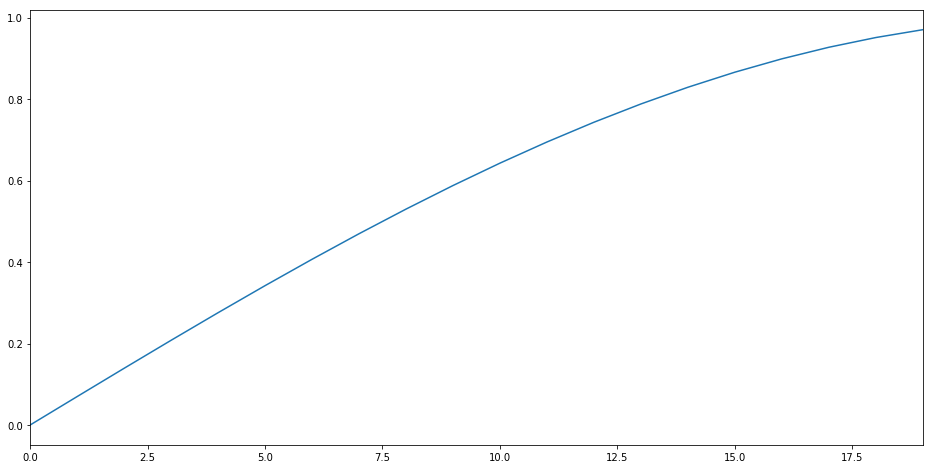

In [694]:
%matplotlib inline

pd.Series(X_tr_f[0]).plot.line(figsize=(16, 8))

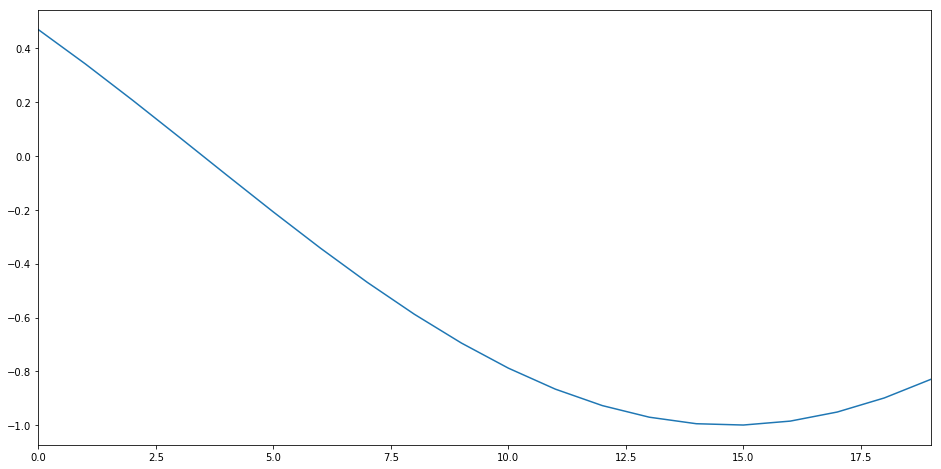

In [695]:
pd.Series(y_tr_f[:N_WINDOW_POINTS]).plot.line(figsize=(16, 8))

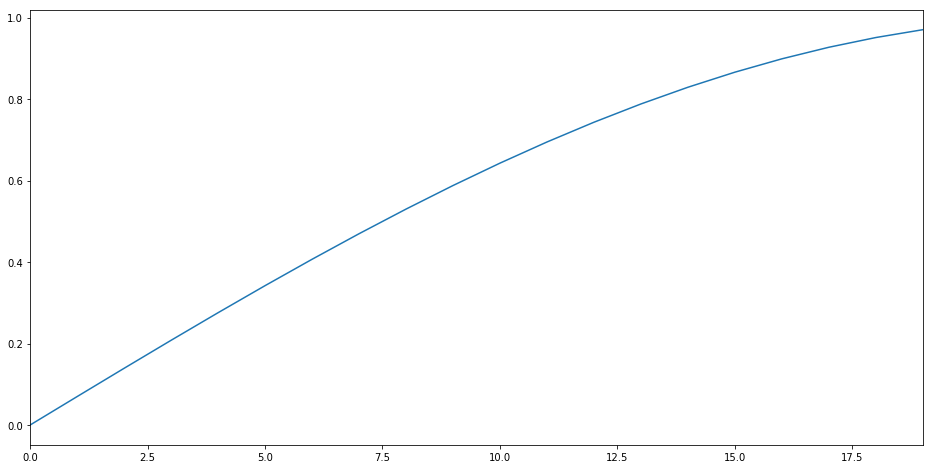

In [696]:
pd.Series(X_te_f[0]).plot.line(figsize=(16, 8))

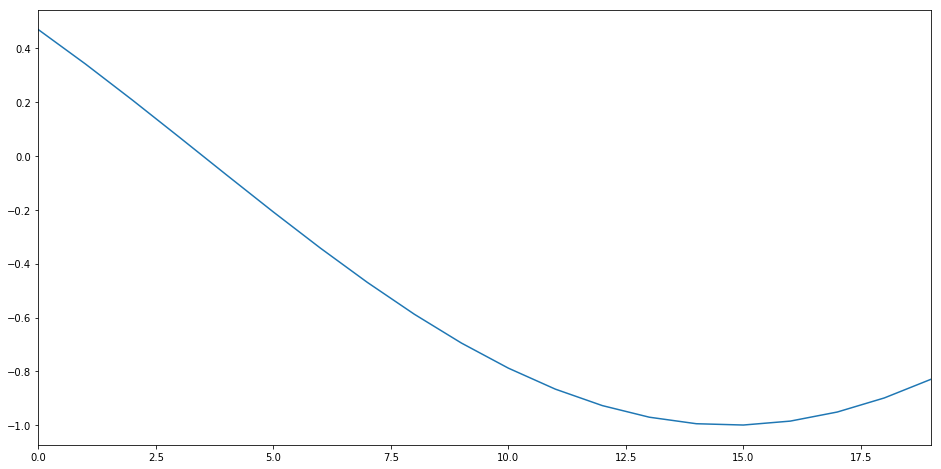

In [697]:
pd.Series(y_te_f[:N_WINDOW_POINTS]).plot.line(figsize=(16, 8))

In [698]:
n_features = 1

In [699]:
(X_tr_f[0], y_tr_f[0])

(array([0.        , 0.06975647, 0.1391731 , 0.20791169, 0.27563736,
        0.34202015, 0.40673664, 0.46947157, 0.52991927, 0.58778524,
        0.64278764, 0.6946584 , 0.7431448 , 0.7880108 , 0.82903755,
        0.8660254 , 0.89879405, 0.92718387, 0.95105654, 0.9702957 ],
       dtype=float32), 0.46947157)

In [700]:
X_tr_s = X_tr_f.reshape(X_tr_f.shape[0], X_tr_f.shape[1], 1)
X_tr_s[0][:5]

array([[0.        ],
       [0.06975647],
       [0.1391731 ],
       [0.20791169],
       [0.27563736]], dtype=float32)

In [701]:
y_tr_s = y_tr_f

In [702]:
X_te_s = X_te_f.reshape(X_te_f.shape[0], X_te_f.shape[1], 1)
X_te_s[0][:5]

array([[0.        ],
       [0.06975647],
       [0.1391731 ],
       [0.20791169],
       [0.27563736]])

In [703]:
y_te_s = y_te_f

In [704]:
def add_stats(row):
    stats = [
        np.abs(row[-1]),
        -np.abs(row[-1]),
#         np.mean(row),
#         np.max(row),
#         np.min(row),
#         np.var(row)
    ]

    return np.array([(list(x) + list(stats)) for x in row])

In [705]:
# %%time
# X_tr_s = np.array([add_stats(row) for row in X_tr_s])
# print(X_tr_s[0][0], X_tr_s[0][1])

In [706]:
# %%time
# X_te_s = np.array([add_stats(row) for row in X_te_s])
# print(X_te_s[0][0], X_te_s[0][1])

In [707]:
N_REPEAT = 4
N_REPEAT

4

In [708]:
len(X_tr_s)

2000

In [709]:
# X_tr_s = np.repeat(X_tr_s, N_REPEAT, axis=0)
# X_tr_s[0][0], X_tr_s[1][0]

In [710]:
# y_tr_s = np.repeat(y_tr_s, N_REPEAT, axis=0)
# y_tr_s[0], y_tr_s[1]

In [711]:
# X_te_s = np.repeat(X_te_s, N_REPEAT, axis=0)
# X_te_s[0][0], X_te_s[1][0]

In [712]:
# y_te_s = np.repeat(y_te_s, N_REPEAT, axis=0)
# y_tr_s[0], y_tr_s[1]

## Finished data processing!

## Moving on to training NN

In [713]:
import numpy as np

In [714]:
# num_steps=100, 24 hidden states

In [715]:
import keras
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM, Reshape, GRU, CuDNNGRU, GaussianNoise
from keras.layers import Convolution2D, MaxPooling2D, Layer, Input, BatchNormalization
from keras.utils import np_utils
from keras.regularizers import L1L2
from keras.layers.merge import concatenate

tf.set_random_seed(1234)

In [716]:
X_tr_s.shape, y_tr_s.shape # , X_te_s.shape, y_te_s.shape

((2000, 20, 1), (2000,))

In [717]:
y_tr_s

array([ 0.46947157,  0.34202015,  0.20791169, ..., -0.77051324,
       -0.90482706, -0.9822872 ], dtype=float32)

In [718]:
from keras import backend as K
from keras.layers import Layer

class DebugLayer(Layer):

    def __init__(self, output_dim, **kwargs):
        self.output_dim = output_dim
        super(DebugLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        super(DebugLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, x):
        print(x[0])
        return x

In [367]:
from scipy.signal import savgol_filter
from matplotlib import pyplot as plt


# TensorBoard callback
# tensorboard_cb = keras.callbacks.TensorBoard(
#     log_dir='./logs',
#     batch_size=BATCH_SIZE,
#     # histogram_freq='batch',
#     write_graph=True,
#     write_grads=True,
#     write_images=True
# )

class TestModel(keras.callbacks.Callback):
    def __init__(self, model, I=200, batch_size=1):
        self.model = model
        self.I = I
        self.batch_size = batch_size
        
    def on_train_begin(self, epoch_n):
        (fig, ax) = plt.subplots(figsize=(12, 8))
        I = self.I
#         (fig, ax) = plt.subplots()
        self.fig = fig
        self.ax = ax
        
        feat = pd.Series((np.array(list(map(lambda row: row[-1][0], X_tr_s[:I])))))

        feat_data, =  ax.plot(feat.values, label='feature')

        targ = (pd.Series((y_tr_s[:I])))

        pred = pd.Series(np.zeros(I))
        # pred = (pred * 2.2) + 0.001
        pred = pred + 0.001

        zeros = pd.Series(np.zeros(I))
        zeros.plot.line(ax=ax, label='0')

        targ_data, = ax.plot(targ.values, label='target')

        pred_data, = ax.plot(pred.values, label='predicted')
        # pd.Series(savgol_filter(pred, 5, 3)).plot.line(ax=ax, label='savgol(predicted)')
        
        self.feat_data = feat_data
        self.targ_data = targ_data
        self.pred_data = pred_data
        
        ax.legend(loc='upper right')
        ax.set_title('NN predictions on first {} samples'.format(I))
        ax.set_xlabel('index')
        ax.set_ylabel('value')
        
        plt.show()
        fig.canvas.draw()
        
        
    def on_epoch_end(self, epoch_n, logs={}):
        loss = logs['loss']
        model = self.model
        
        fig = self.fig
        ax = self.ax
        
        I = self.I
        batch_size = self.batch_size

        feat = pd.Series((np.array(list(map(lambda row: row[-1][0], X_tr_s[:I])))))

        self.feat_data.set_ydata(feat.values)

        targ = (pd.Series((y_tr_s[:I])))

        pred = pd.Series(predict(model, X_tr_s[:I], batch_size=batch_size))
        # pred = (pred * 2.2) + 0.001
        pred = pred + 0.001

        # zeros = pd.Series(np.zeros(I))
        # zeros.plot.line(ax=ax, label='0')

        self.targ_data.set_ydata(targ.values)

        self.pred_data.set_ydata(pred.values)
        # pd.Series(savgol_filter(pred, 5, 3)).plot.line(ax=ax, label='savgol(predicted)')

        # pd.Series(normalize(np.array(list(map(lambda w: w[-1], X_tr_f[:I]))))).plot.line(ax=ax, label='feature')

        ax.set_title('NN predictions on first {} samples, epoch {}, loss={:.4f}'.format(I, epoch_n, loss))
        
        fig.canvas.draw()


# Callback to display the target and prediciton
# test_model_cb = keras.callbacks.LambdaCallback(on_epoch_end=testmodel)

In [551]:
from keras import backend as K
    
N_UNITS = 24
BATCH_SIZE = 1

def load_model(filepath):
    model = keras.models.load_model(filepath)
    
    return model
    
    
    
def create_model(params):
    input_L = Input(
        shape=(N_WINDOW_POINTS, n_features),
        batch_shape=(params['batch_size'], N_WINDOW_POINTS, n_features),
    )

    # bn_L = (BatchNormalization()(input_L))

#     GRU_L = CuDNNGRU
    GRU_L = GRU
    
    gru_1_L = GRU_L(
        params['n_units'],
        input_shape=(N_WINDOW_POINTS, n_features),
        batch_input_shape=(params['batch_size'], N_WINDOW_POINTS, n_features),
#         bias_regularizer=L1L2(l1=0.01, l2=0.01),
#         recurrent_regularizer=L1L2(l1=0.01, l2=0.01),
        stateful=True,
        # reset_after=True,
        # batch_input_shape=(params['batch_size'], N_WINDOW_POINTS, n_features),
#         activation='tanh',
#         recurrent_activation='hard_sigmoid',
        # kernel_initializer=keras.initializers.RandomNormal(stddev=0.1),
        kernel_initializer=keras.initializers.glorot_uniform(seed=43),
#         recurrent_initializer=keras.initializers.Orthogonal(gain=1.0, seed=42),
        recurrent_initializer=keras.initializers.glorot_uniform(seed=43),
        # kernel_initializer='identity',
        bias_initializer='zeros',
#         return_sequences=True,
    )(input_L)

    
    
#     gru_2_L = GRU_L(
#         params['n_units'],
#         input_shape=(N_WINDOW_POINTS, n_features),
#         batch_input_shape=(params['batch_size'], N_WINDOW_POINTS, n_features),
# #         bias_regularizer=L1L2(l1=0.01, l2=0.01),
# #         recurrent_regularizer=L1L2(l1=0.01, l2=0.01),
#         stateful=True,
#         # reset_after=True,
#         # batch_input_shape=(params['batch_size'], N_WINDOW_POINTS, n_features),
# #         activation='tanh',
# #         recurrent_activation='hard_sigmoid',
#         # kernel_initializer=keras.initializers.RandomNormal(stddev=0.1),
#         kernel_initializer=keras.initializers.glorot_uniform(seed=43),
# #         recurrent_initializer=keras.initializers.Orthogonal(gain=1.0, seed=42),
#         recurrent_initializer=keras.initializers.glorot_uniform(seed=43),
#         # kernel_initializer='identity',
#         bias_initializer='zeros',
#     #     return_sequences=True,
#     )(gru_1_L)

    dense_2_l = Dense(
        1,
        activation=None,
        kernel_initializer='identity',
        bias_initializer='zeros',
    # )(gru_1_l)
    )(gru_1_L)


    model = Model(inputs=input_L, outputs=dense_2_l)
    
    return model

    

def train_model(model, X_tr, y_tr, x_val, y_val, params, verbose_fit=0):
    print(params)
    
    optimizer = keras.optimizers.adam(lr=params['lr'], clipvalue=10, clipnorm=10)
    # optimizer = keras.optimizers.SGD(lr=params['lr'], decay=0.2)


    def mean_squared_error(y_true, y_pred):
        return K.mean(K.square(10 * (y_pred - y_true)), axis=-1)

    # model.compile(optimizer=optimizer, loss='mse')
    model.compile(optimizer=optimizer, loss='mae')
    
    # TRAIN

    es_cb = keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=0.0005,
        patience=8,
        verbose=0,
        mode='auto',
    )

    def step_decay(epoch):
        initial_lrate = params['lr']
        drop = 0.8
        epochs_drop = 40.0
        lrate = initial_lrate * math.pow(drop,  
               math.floor((1+epoch)/epochs_drop))
        return lrate

    lrate = keras.callbacks.LearningRateScheduler(step_decay)

    test_model_cb = TestModel(model, I=min(params['n_samples'], 2000), batch_size=params['batch_size'])

    history = model.fit(
        X_tr_s[:params['n_samples']],
        y_tr_s[:params['n_samples']],
#         X_tr_s[:40],
#         y_tr_s[:40],
        batch_size=params['batch_size'],
        shuffle=False,
    #     epochs=400,
#         epochs=100,
        epochs=params['epochs'],
        verbose=verbose_fit,
#         validation_data=(X_te_s[:1000], y_te_s[:1000]),
        # validation_data=(X_te_s[:200], y_te_s[:200]),
        # callbacks=[es_cb, test_model_cb, tensorboard_cb],
        callbacks=[es_cb, test_model_cb, lrate],
    )
    
    return (history, model)


def create_and_train_model(X_tr, y_tr, x_val, y_val, params):
    model = create_model(params)

    (history, model) = train_model(
        model,
        X_tr_s,
        y_tr_s,
        X_te_s,
        y_te_s,
#         X_tr_s[:params['n_samples']],
#         y_tr_s[:params['n_samples']],
#         X_te_s[:params['n_samples']],
#         y_te_s[:params['n_samples']],
        params
    )
    
    return (history, model)

In [369]:
import math

def predict(model, X_input, batch_size=1, verbose=0):
    # X_input = np.array(rows).reshape(rows.shape[0], rows.shape[1], n_features)
    
    return np.array(
        model.predict(
            X_input[:(math.floor(len(X_input) / batch_size) * batch_size)],
            batch_size=batch_size,
            verbose=verbose,
        )
    ).flatten()








  0%|          | 0/3 [00:00<?, ?it/s]

{'lr': 0.006, 'n_samples': 69, 'n_units': 2, 'batch_size': 1, 'epochs': 200, 'optimizer': <class 'keras.optimizers.Adam'>}


<IPython.core.display.Javascript object>


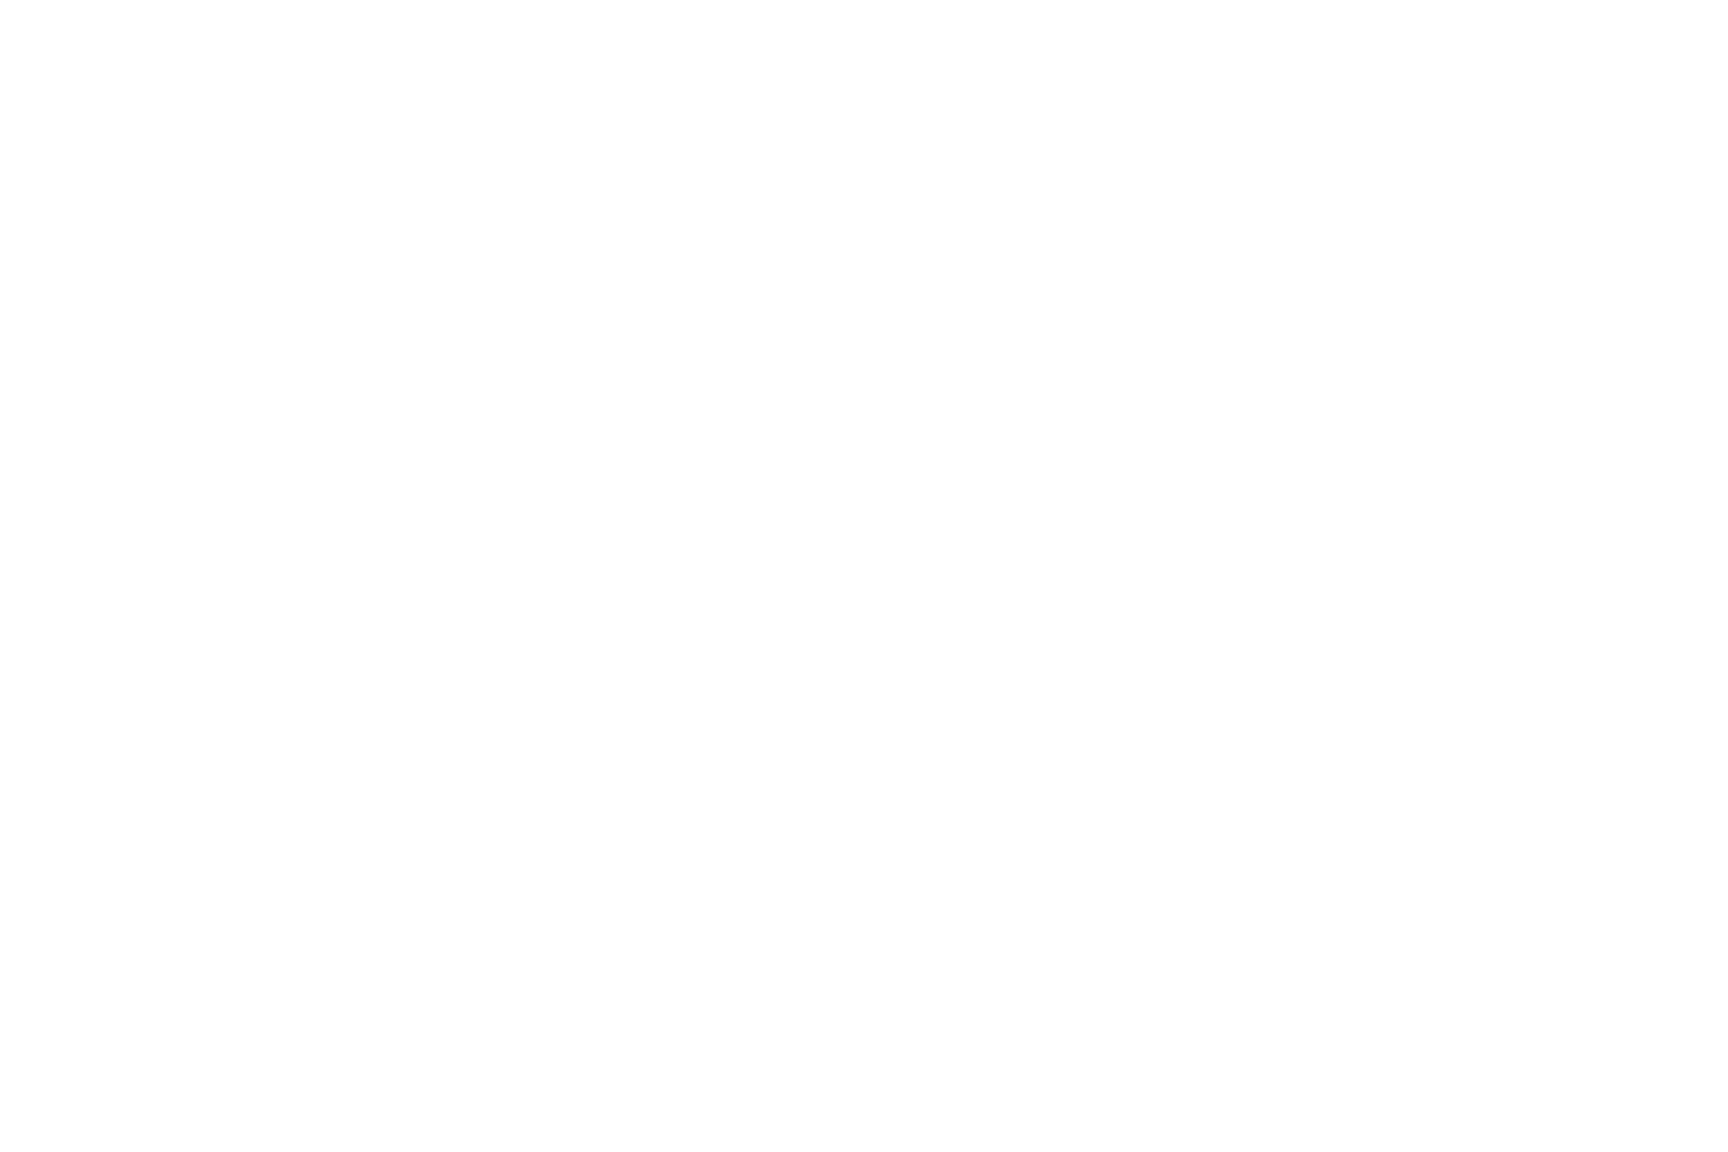

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


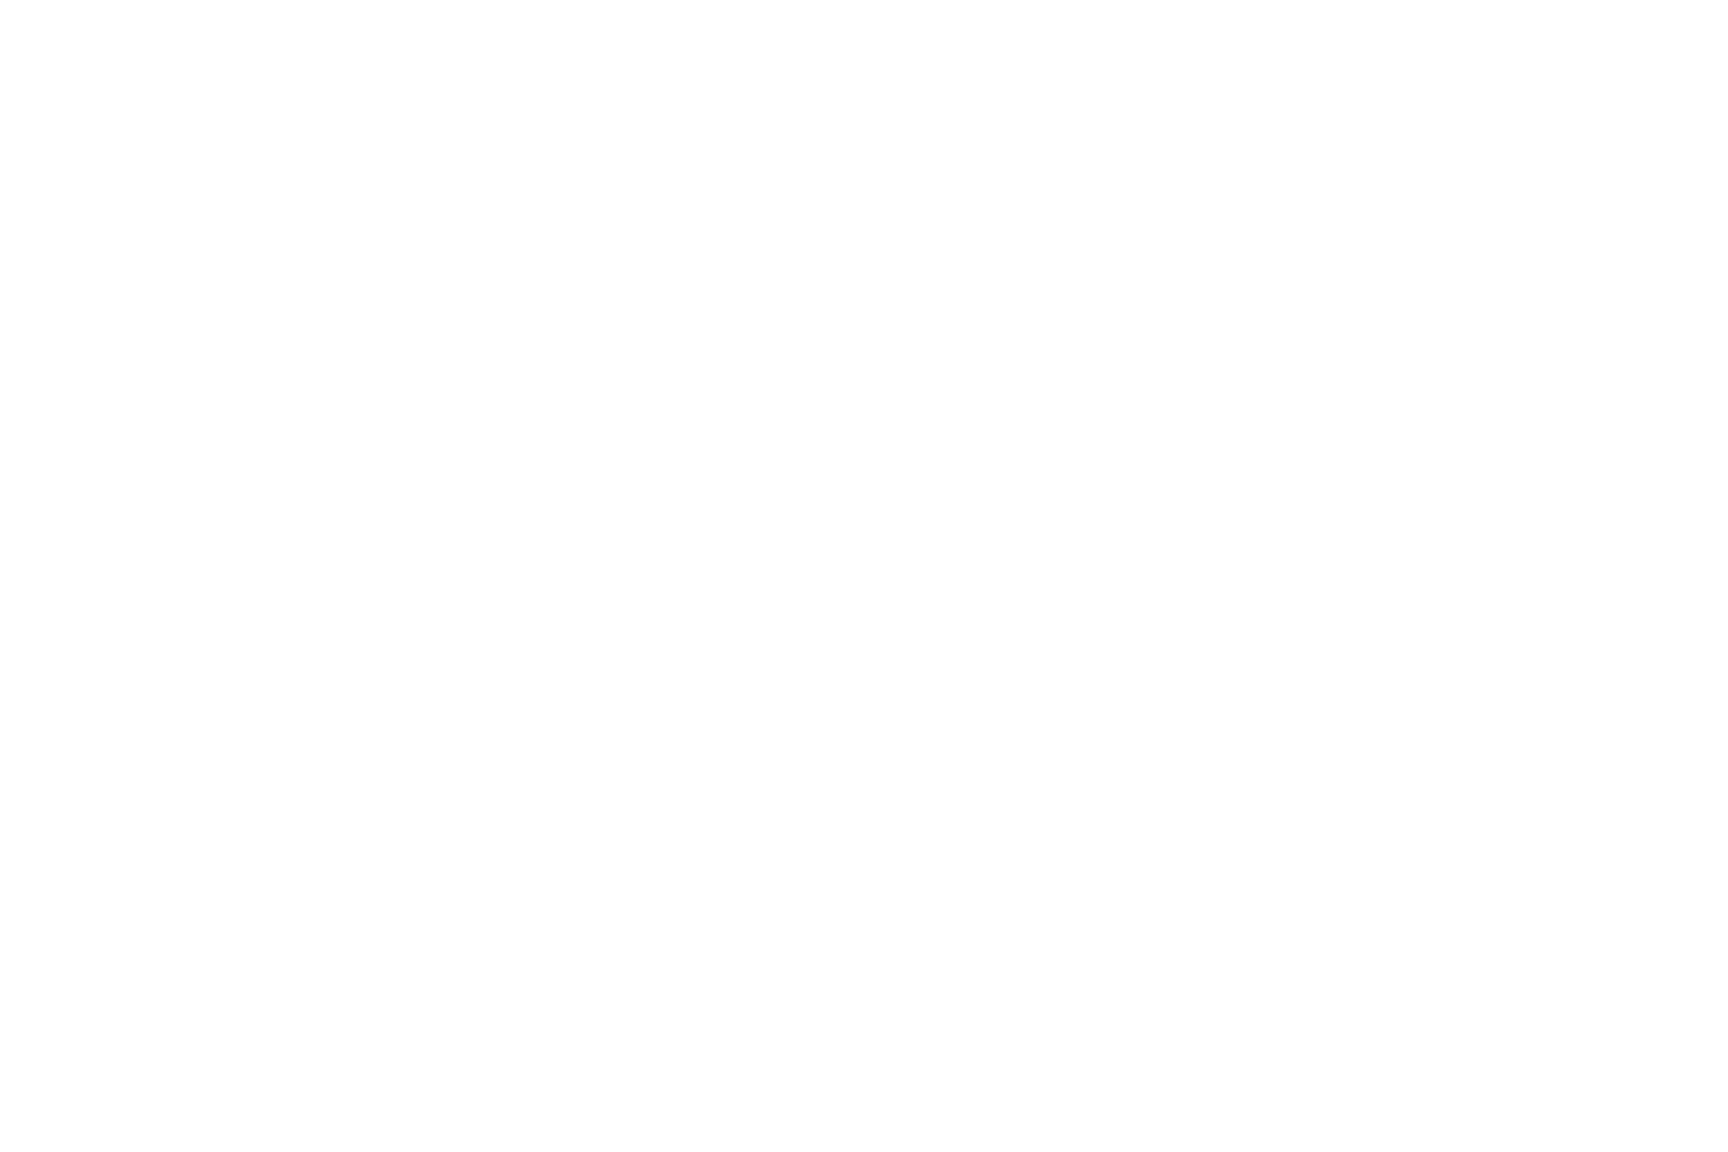

In [720]:
%matplotlib notebook

from keras.optimizers import Adam, Nadam, RMSprop
import talos as ta

p = {
     'lr': [0.001, 0.003, 0.006],
     'n_samples': [69],
     'n_units': [2],
#      'batch_size': [10, 100, 1000],
     'batch_size': [1],
     'epochs': [200],
     # 'dropout': (0, 0.5, 5),
     # 'weight_regulizer':[None],
     # 'emb_output_dims': [None],
     # 'shape':['brick','long_funnel'],
     'optimizer': [Adam],
 }

# 'lr': 0.006,
# 'n_samples': 500,
# 'n_units': 12,
# 'batch_size': 100,
# 'epochs': 300,

# and run the experiment
t = ta.Scan(x=X_tr_s[:np.max(p['n_samples'])],
            y=y_tr_s[:np.max(p['n_samples'])],
            model=create_and_train_model,
#             grid_downsample=0.5,
            params=p)

globals().update(locals())

In [74]:
r = ta.Reporting(t)
r.data.sort_values(by='loss')


NameError: name 't' is not defined

In [ ]:
best_params = r.data.loc[3]
best_params

In [ ]:
type(best_params)

{'lr': 0.005, 'n_samples': 1570, 'n_units': 3, 'batch_size': 10, 'epochs': 100, 'optimizer': <class 'keras.optimizers.Adam'>}


<IPython.core.display.Javascript object>


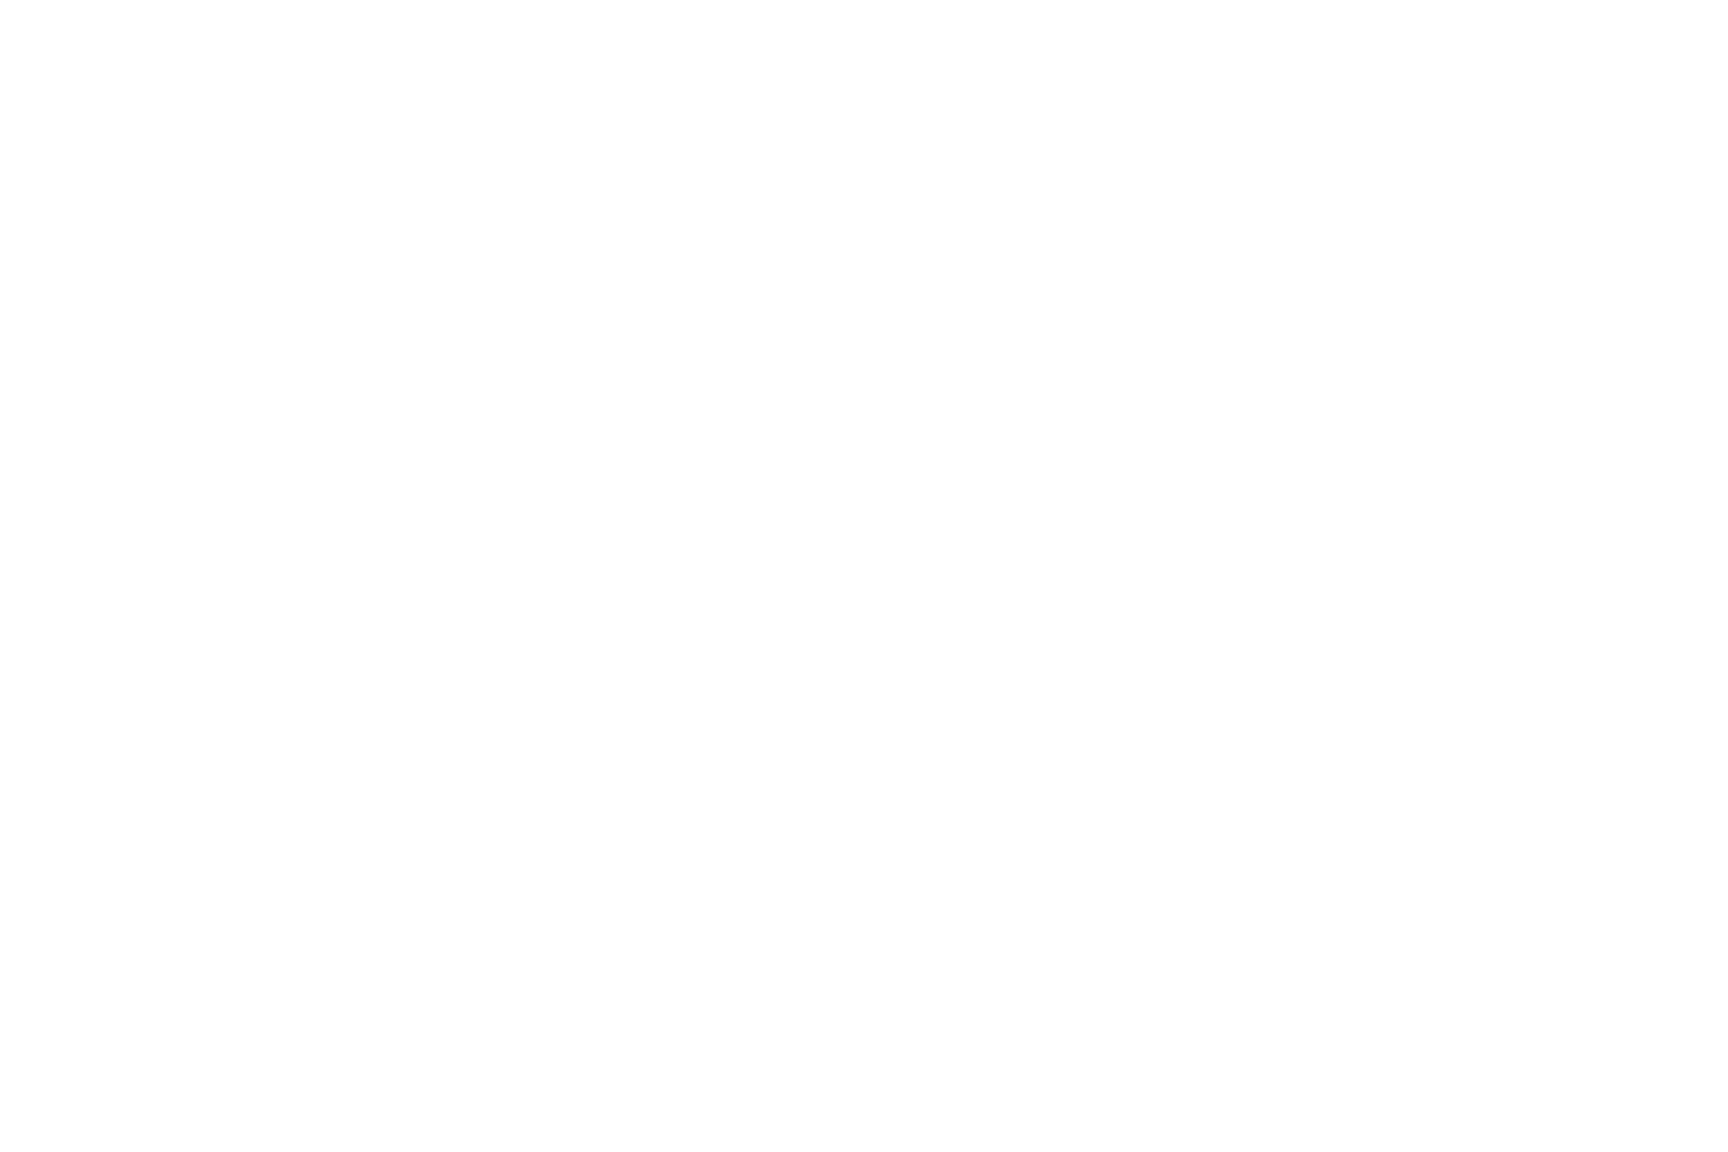

Epoch 1/100
1570/1570 [==============================] - 7s 5ms/step - loss: 0.7119
Epoch 2/100
1570/1570 [==============================] - 1s 887us/step - loss: 0.6418
Epoch 3/100
1570/1570 [==============================] - 1s 891us/step - loss: 0.6221
Epoch 4/100
1570/1570 [==============================] - 1s 887us/step - loss: 0.5965
Epoch 5/100
1570/1570 [==============================] - 1s 883us/step - loss: 0.4210
Epoch 6/100
1570/1570 [==============================] - 1s 888us/step - loss: 0.1952
Epoch 7/100
1570/1570 [==============================] - 1s 889us/step - loss: 0.1583
Epoch 8/100
1570/1570 [==============================] - 1s 890us/step - loss: 0.1420
Epoch 9/100
1570/1570 [==============================] - 1s 839us/step - loss: 0.1307
Epoch 10/100
1570/1570 [==============================] - 1s 866us/step - loss: 0.1209
Epoch 11/100
1570/1570 [==============================] - 1s 857us/step - loss: 0.1203
Epoch 12/100
1570/1570 [==============================

1570/1570 [==============================] - 1s 753us/step - loss: 0.0874
Epoch 96/100
1570/1570 [==============================] - 1s 706us/step - loss: 0.0841
Epoch 97/100
1570/1570 [==============================] - 1s 679us/step - loss: 0.0847
Epoch 98/100
1570/1570 [==============================] - 1s 684us/step - loss: 0.0828
Epoch 99/100
1570/1570 [==============================] - 1s 695us/step - loss: 0.0842
Epoch 100/100
1570/1570 [==============================] - 1s 679us/step - loss: 0.0838


<IPython.core.display.Javascript object>


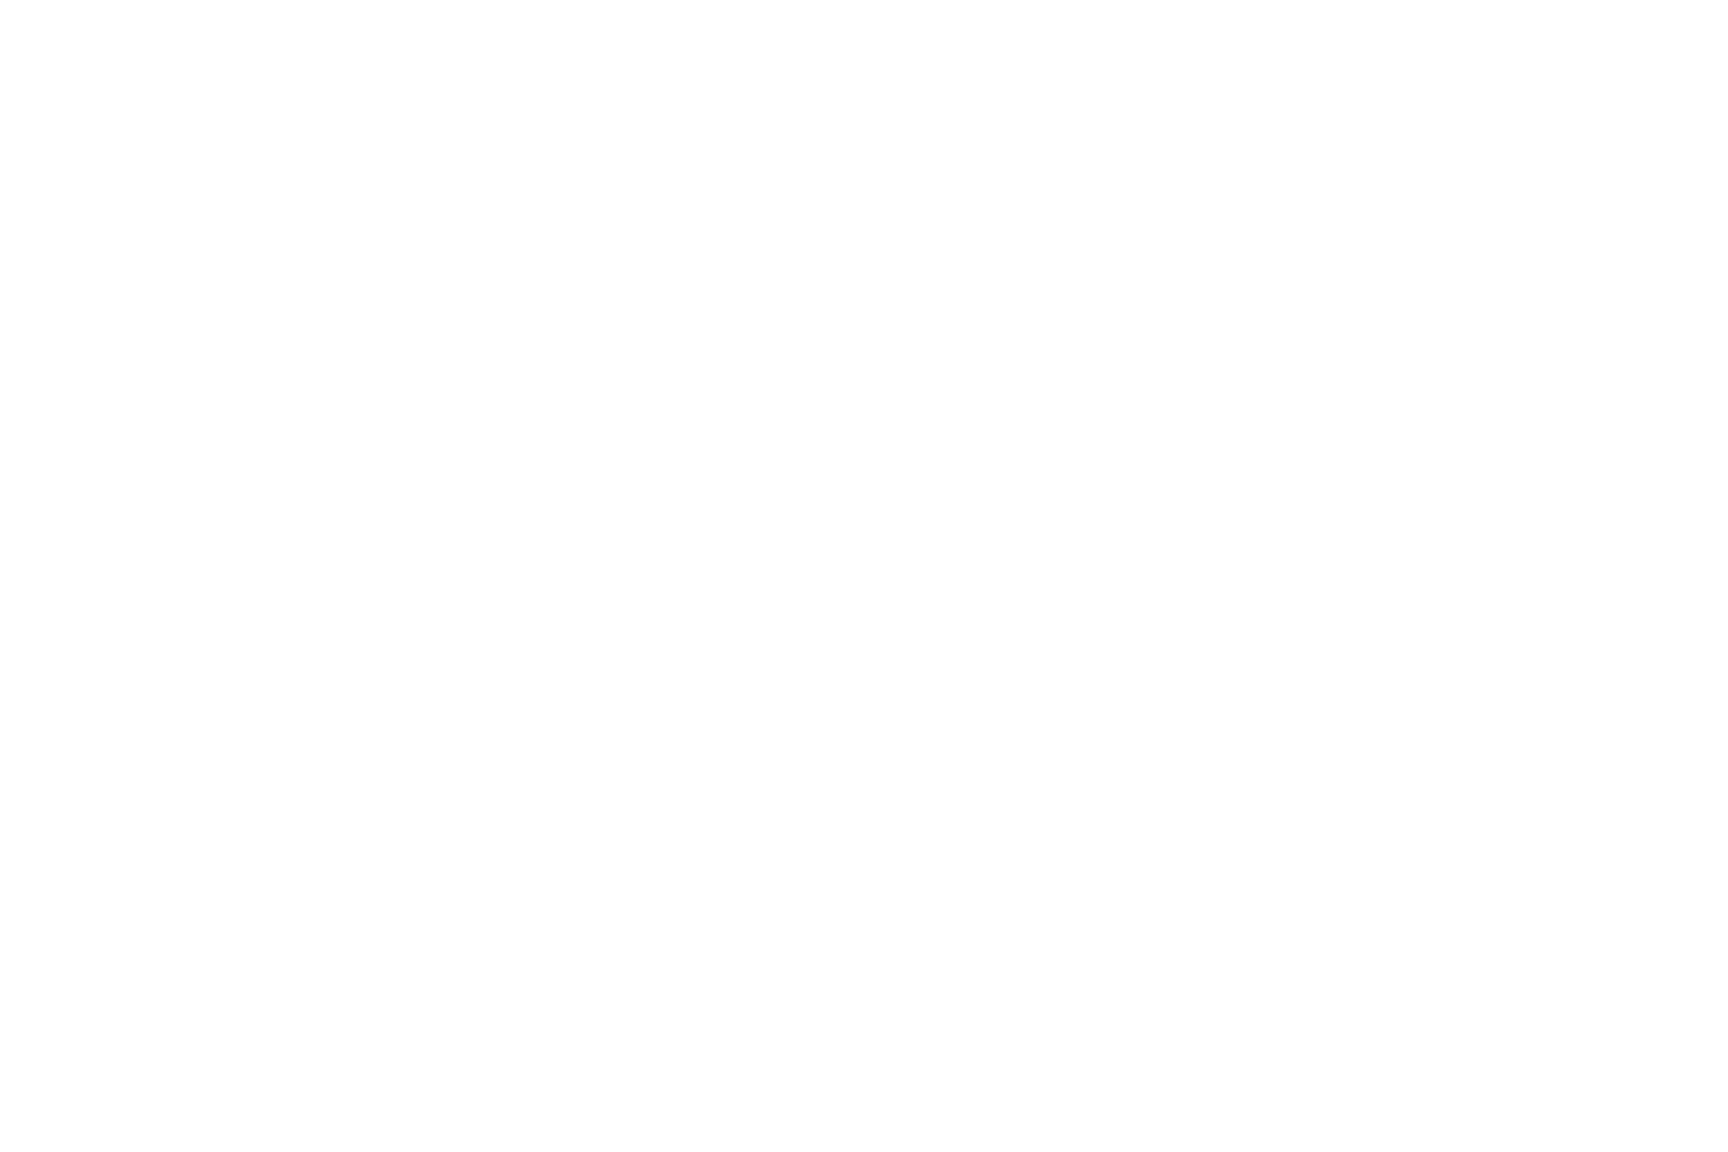

In [731]:
%matplotlib notebook

best_params = {
    'lr': 0.005,
    'n_samples': 1570,
#     'n_samples': 44000,
    'n_units': 3,
    'batch_size': 10,
    'epochs': 100,
    'optimizer': keras.optimizers.Adam,
}

# model = load_model('saved_models/02_peak_comp_60_samples_180_params.h5')
model = create_model(best_params)

history, model = train_model(
    model,
    X_tr_s[:best_params['n_samples']],
    y_tr_s[:best_params['n_samples']],
    X_te_s[:best_params['n_samples']],
    y_te_s[:best_params['n_samples']],
    best_params,
    verbose_fit=1,
)

globals().update(locals())

In [261]:
MAGIC_OFFSET = 0

In [624]:
for layer in model.layers:
    weights = layer.get_weights() # list of numpy arrays
    print(weights)
    print('='*20)

[]
[array([[-1.4716016 , -0.5505455 , -0.32154092, -0.35454592,  0.42446223,
        -1.2500451 ]], dtype=float32), array([[ 0.810348  ,  0.80724597, -0.03116419, -1.2477349 ,  1.1194454 ,
         1.1343789 ],
       [ 0.3242137 ,  0.05022231,  4.612086  ,  3.549716  , -0.96853536,
        -4.0816092 ]], dtype=float32), array([-0.8080397 ,  1.3045865 ,  0.47443655,  0.4165603 ,  0.24793282,
        0.10723918], dtype=float32)]
[array([[1.9314743],
       [2.7459407]], dtype=float32), array([-0.10449177], dtype=float32)]


In [625]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        (10, 20, 1)               0         
_________________________________________________________________
gru_51 (GRU)                 (10, 2)                   24        
_________________________________________________________________
dense_26 (Dense)             (10, 1)                   3         
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# model.save('saved_models/02_peak_comp_60_samples_180_params.h5')

In [626]:
score = model.evaluate(X_te_s[:500], y_te_s[:500], verbose=0, batch_size=best_params['batch_size'])
score

0.19163196451961995

In [ ]:
0.029750008136034012
0.030868683010339737

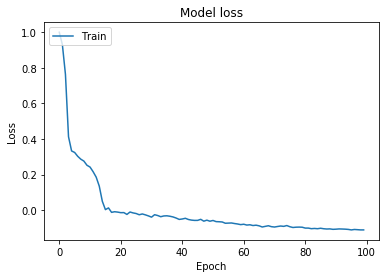

In [722]:
%matplotlib inline

from matplotlib import pyplot as plt

# Plot training & validation loss values
plt.plot(normalize(np.array(history.history['loss'])))
# plt.plot(normalize(np.array(history.history['val_loss'])))
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [ ]:
len(X_te_f)

In [ ]:
predict(model, X_te_s[:100], batch_size=best_params['batch_size'])

In [ ]:
print(X_tr_s[0][-1])

0   -0.239846
1   -0.368690
2   -0.480075
3   -0.576309
4   -0.634567
dtype: float32


Text(0,0.5,'value')

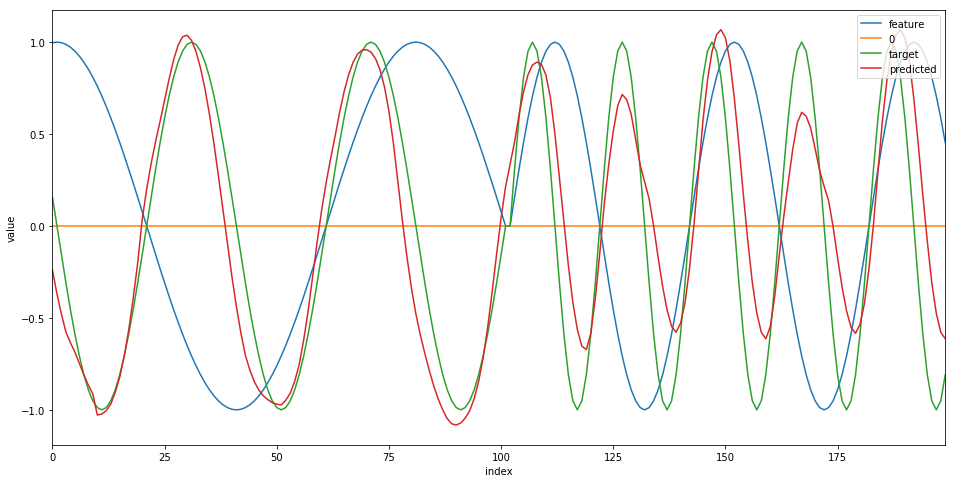

In [734]:
%matplotlib inline
from scipy.signal import savgol_filter

(fig, ax) = plt.subplots(figsize=(16, 8))

# I = 2000
I = 200
OFFSET = int(MAGIC_OFFSET) + 0

FREQ = 20

(X_to_test, y_to_test) = make_windows(
    pd.Series(np.array(make_sin(round(I / 2) + N_WINDOW_POINTS + 1, FREQ * 2) + make_sin(round(I / 2) + N_WINDOW_POINTS + 1, FREQ * 1.0))),
    pd.Series(np.array(make_sin(round(I / 2) + N_WINDOW_POINTS + 1, FREQ) + make_sin(round(I / 2) + N_WINDOW_POINTS + 1, FREQ * 1.0 / 2.0))),
    N_WINDOW_POINTS
)

X_to_test = X_to_test.reshape(X_to_test.shape[0], X_to_test.shape[1], 1)

feat = pd.Series((np.array(list(map(lambda row: row[-1][0], X_to_test[:(I + OFFSET)]))))[OFFSET:])

feat.plot.line(ax=ax, label='feature')

targ = pd.Series(y_to_test[OFFSET:(I + OFFSET)])

pred = pd.Series(predict(model, X_to_test[:(I + OFFSET)], batch_size=best_params['batch_size'])[OFFSET:])
# pred = (pred * 3.2) + 0.001
pred = pred + 0.001

zeros = pd.Series(np.zeros(I))
zeros.plot.line(ax=ax, label='0')

targ.plot.line(ax=ax, label='target')

print(pred[:5])

pred.plot.line(ax=ax, label='predicted')
# pd.Series(savgol_filter(pred, 5, 3)).plot.line(ax=ax, label='savgol(predicted)')

# pd.Series(normalize(np.array(list(map(lambda w: w[-1], X_te_f[:I]))))).plot.line(ax=ax, label='feature')

ax.legend(loc="upper right")
ax.set_xlabel('index')
ax.set_ylabel('value')

In [430]:
X_te_s[], y_te_s[0]

(array([[0.        ],
        [0.15643447],
        [0.30901699],
        [0.4539905 ],
        [0.58778525],
        [0.70710678],
        [0.80901699],
        [0.89100652],
        [0.95105652],
        [0.98768834],
        [1.        ],
        [0.98768834],
        [0.95105652],
        [0.89100652],
        [0.80901699],
        [0.70710678],
        [0.58778525],
        [0.4539905 ],
        [0.30901699],
        [0.15643447]]), -0.3090169943749476)


## Time to evaluate performance

In [548]:
# predictions = predict(model, X_tr_s[:(44000 * 6)], batch_size=best_params['batch_size'], verbose=1)
predictions = np.repeat(predict(model, X_tr_s, batch_size=best_params['batch_size'], verbose=1), 10, axis=0)
len(predictions), predictions[:10], np.max(predictions), np.min(predictions)

770/770 [==============================] - 0s 375us/step


(7700, array([-0.22622183, -0.22622183, -0.22622183, -0.22622183, -0.22622183,
        -0.22622183, -0.22622183, -0.22622183, -0.22622183, -0.22622183],
       dtype=float32), 0.95824015, -1.0708393)

In [432]:
predictions_n = np.clip(predictions, -1.0, 1.0) * MAX_VALUE
len(predictions_n), predictions_n[:10], np.max(predictions_n), np.min(predictions_n)

(79700, array([-0.31091902, -0.31091902, -0.31091902, -0.31091902, -0.31091902,
        -0.31091902, -0.31091902, -0.31091902, -0.31091902, -0.31091902],
       dtype=float32), 0.9909252, -0.99588704)

In [433]:
from scipy.io import wavfile

wavfile.write('output/pred_out_pitch_shift_v2.wav', 44000, predictions)

In [ ]:
len(predictions)